In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## 구글 드라이브와 연동 (코랩 새로 킬때 마다 지워지기 때문에)
데이터 혹은 모델을 저장해서 쓰자.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


구글 GPU 좀 써보자

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [5]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transform)

In [6]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [7]:
train_DS.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [8]:
train_DS.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [9]:
train_DS.data.shape

torch.Size([60000, 28, 28])

In [10]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

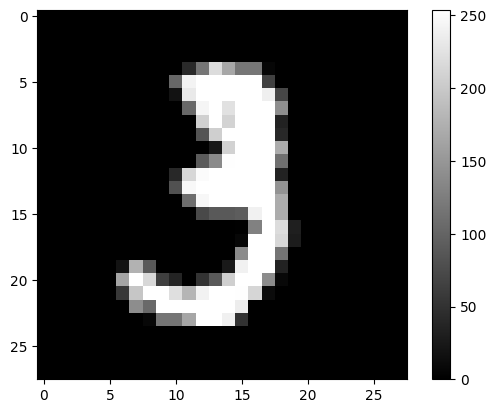

In [11]:
plt.imshow(train_DS.data[10], cmap="gray")
plt.colorbar()

In [12]:
print(train_DS.targets.shape)

torch.Size([60000])


DataLoader 구경

In [13]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [14]:
print(len(train_DL.dataset))

60000


<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.Size([32])
tensor(7)
torch.uint8
torch.float32


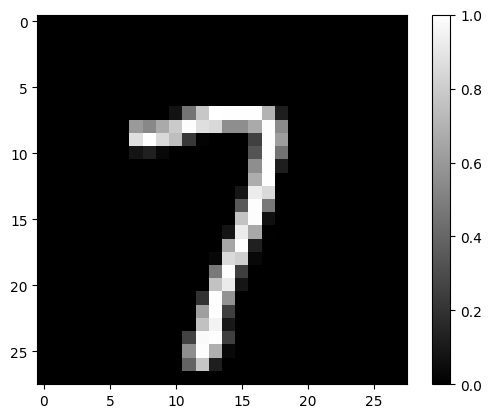

In [15]:
x_batch, y_batch = next(iter(train_DL)) # 데이터 한 국자
print(type(train_DS.data))
print(type(x_batch))
print(x_batch.shape)
print(y_batch.shape)
plt.imshow(x_batch[0].squeeze(), cmap="gray")
plt.colorbar()
print(y_batch[0])

print(train_DL.dataset.data.dtype)
print(x_batch.dtype)
# ToTensor 의 역할
# 1. tensor로 바꿔준다
# 2. 개채행열로 바꿔준다
# 3. 0~1 사이로 바꿔준다 (int -> float)

## 본격적으로 모델 만들기!

In [26]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(
            nn.Linear(28*28,100),
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self,x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x

In [27]:
# flatten 확인

x_batch, _ = next(iter(train_DL))
flat_images = torch.flatten(x_batch)
flat_images.shape
flat_images2 = torch.flatten(x_batch,start_dim=1)
print(flat_images2.shape)

torch.Size([32, 784])


In [28]:
model = MLP()
print(model)
x_batch, _ = next(iter(train_DL))
x_batch.shape
print(model(x_batch).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


## 모델 훈련시키기

In [41]:
from torch import optim

LR = 1e-3
EPOCH = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=LR)
def Train(model, train_DL, criterion, optimizer):

    loss_history =[]
    NoT = len(train_DL.dataset)

    model.train() # train mode로 전환
    for ep in range(EPOCH):
        rloss = 0 # running loss
        for x_batch, y_batch in train_DL:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            # inference
            y_hat = model(x_batch)
            # loss
            loss = criterion(y_hat, y_batch)
            # update
            optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
            loss.backward() # backpropagation
            optimizer.step() # weight update
            # loss accumulation
            loss_b = loss.item() * x_batch.shape[0] # batch loss # BATCH_SIZE를 곱하면 마지막 18개도 32개를 곱하니까..
            rloss += loss_b # running loss
        # print loss
        loss_e = rloss/NoT
        loss_history += [loss_e]
        print(f"Epoch: {ep+1}, train loss: {round(loss_e,3)}")
        print("-"*20)

    return loss_history
model = model.to(device)
Train(model=model, train_DL=train_DL,criterion=criterion,optimizer=optimizer)

Epoch: 1, train loss: 0.31
--------------------
Epoch: 2, train loss: 0.141
--------------------
Epoch: 3, train loss: 0.097
--------------------
Epoch: 4, train loss: 0.072
--------------------
Epoch: 5, train loss: 0.057
--------------------


[0.3104702487478654,
 0.1408968119819959,
 0.09728109187160928,
 0.07234855828409394,
 0.056992845996748656]

## Cross Entropy 확인 (왜 모델에 softmax를 안 붙였을까)

In [39]:
# cross entropy 구하는 여러가지 방법
import torch.nn.functional as F

y_hat = torch.randn(3, 5) # data는 세 개, 5 종류로 분류하는 문제 가정
print(y_hat) # 가로 축으로 합이 1이 아님, 즉, softmax 통과 전
y_batch = torch.randint(5, (3,))
print(y_batch)

# 방법 1
loss = F.cross_entropy(y_hat,y_batch)
print(loss)

# 방법2
criterion = nn.CrossEntropyLoss()
print(criterion(y_hat,y_batch))

# 방법3
y_hat_soft = F.softmax(y_hat,dim=1)
print(y_hat_soft)
loss = 0
for i, val in enumerate(y_hat_soft):
    loss += -torch.log(val[y_batch[i]])
print(loss/3) # 평균이 내장되어 있음을 알 수 있다

tensor([[ 1.0553, -0.6482,  1.3658,  0.1808, -0.4992],
        [ 0.4524,  0.1607,  0.1829, -0.8106, -0.8684],
        [-0.2619, -0.4300, -1.4805,  1.4511,  0.4947]])
tensor([2, 2, 0])
tensor(1.5057)
tensor(1.5057)
tensor([[0.3150, 0.0573, 0.4297, 0.1314, 0.0666],
        [0.3267, 0.2441, 0.2496, 0.0924, 0.0872],
        [0.1019, 0.0861, 0.0301, 0.5649, 0.2171]])
tensor(1.5057)


## 모델 학습시키기

Epoch: 1, train loss: 0.306
--------------------
Epoch: 2, train loss: 0.142
--------------------
Epoch: 3, train loss: 0.099
--------------------
Epoch: 4, train loss: 0.075
--------------------
Epoch: 5, train loss: 0.058
--------------------


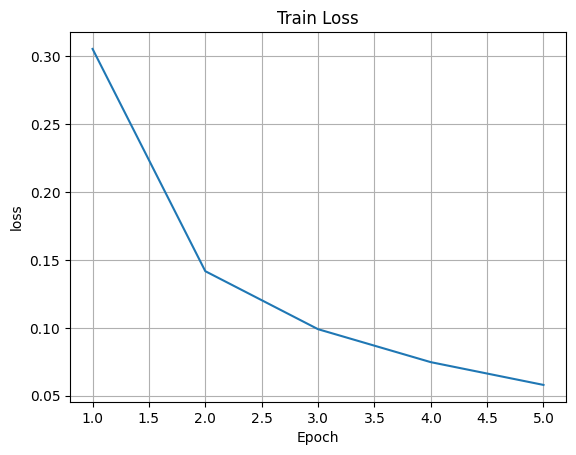

In [43]:
model = MLP().to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)
loss_history = Train(model,train_DL,criterion,optimizer=optimizer)

plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title("Train Loss")
plt.grid()

## 모델 저장하기 & 불러오기

In [45]:
# save_model_path = "/content/drive/MyDrive/Colab Notebooks/results/MLP_MNIST.pt"
# torch.save(model.state_dict(),save_model_path)
# model.state_dict()

OrderedDict([('linear.0.weight',
              tensor([[ 0.0040, -0.0031, -0.0067,  ..., -0.0025, -0.0023, -0.0235],
                      [-0.0321,  0.0195,  0.0163,  ...,  0.0006, -0.0288,  0.0125],
                      [-0.0064, -0.0130, -0.0346,  ..., -0.0136,  0.0008, -0.0332],
                      ...,
                      [ 0.0303, -0.0154,  0.0229,  ..., -0.0078, -0.0073, -0.0004],
                      [-0.0267, -0.0097,  0.0153,  ...,  0.0010,  0.0203, -0.0141],
                      [-0.0040, -0.0221, -0.0343,  ..., -0.0044, -0.0313,  0.0011]],
                     device='cuda:0')),
             ('linear.0.bias',
              tensor([-0.0116, -0.0517,  0.1114,  0.0943,  0.1859,  0.1971,  0.1775,  0.0710,
                       0.0797, -0.0598,  0.0115, -0.1243, -0.1539, -0.0417, -0.0585, -0.0167,
                      -0.0885,  0.0534, -0.0530,  0.0592,  0.0028,  0.1251,  0.2137,  0.0714,
                       0.0596,  0.0017, -0.1564, -0.0726,  0.0733,  0.0005, -0.012

In [47]:
load_model = MLP().to(device)
load_model.state_dict(torch.load(save_model_path, map_location=device))
# map_location 있어야 GPU로 학습했던 거 현재 device로 불러올 수 있음

/tmp/ipython-input-2522828568.py:2: FutureWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/main/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  load_model.state_dict(torch.load(save_model_path, map_location=device))


OrderedDict([('linear.0.weight',
              tensor([[ 0.0265, -0.0266, -0.0292,  ..., -0.0051,  0.0046, -0.0099],
                      [-0.0270, -0.0218,  0.0170,  ..., -0.0102,  0.0058,  0.0309],
                      [-0.0028, -0.0355,  0.0306,  ...,  0.0247,  0.0170,  0.0074],
                      ...,
                      [-0.0028,  0.0321,  0.0136,  ...,  0.0115,  0.0192,  0.0303],
                      [-0.0128, -0.0295,  0.0336,  ..., -0.0077, -0.0187,  0.0035],
                      [ 0.0258,  0.0039,  0.0210,  ..., -0.0143,  0.0123, -0.0199]],
                     device='cuda:0')),
             ('linear.0.bias',
              tensor([ 0.0017,  0.0157, -0.0044,  0.0297,  0.0215,  0.0266,  0.0279,  0.0088,
                      -0.0032,  0.0355,  0.0209, -0.0092, -0.0293,  0.0268,  0.0243,  0.0127,
                      -0.0172, -0.0355,  0.0081, -0.0014,  0.0125, -0.0099,  0.0057,  0.0190,
                       0.0209,  0.0014,  0.0256,  0.0318, -0.0077,  0.0335,  0.028

##모델 테스트하기

In [66]:
def Test(model,test_DL):
    model.eval()
    with torch.inference_mode():
        recorrect = 0
        for x_batch,y_batch in test_DL:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            y_hat = model(x_batch)

            #accuracy accumulation
            # print(y_hat.shape)
            pred = (torch.argmax(y_hat,dim=1))
            correct_b = torch.sum(pred==y_batch).item()
            recorrect += correct_b
        accuracy_e = recorrect / len(test_DL.dataset) *100
    print(f"Test accuracy: {recorrect}/{len(test_DL.dataset)} ({round(accuracy_e,1)} %)")

Test(model,test_DL)

Test accuracy: 9762/10000 (97.6 %)


In [69]:
def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch = next(iter(test_DL))
        x_batch = x_batch.to(device)
        y_hat = model(x_batch)
        pred = y_hat.argmax(dim=1)

    x_batch = x_batch.to("cpu")

    plt.figure(figsize=(8,4))
    for idx in range(6):
        plt.subplot(2,3, idx+1, xticks=[], yticks=[])
        plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap="gray")
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color = "g" if pred_class==true_class else "r")

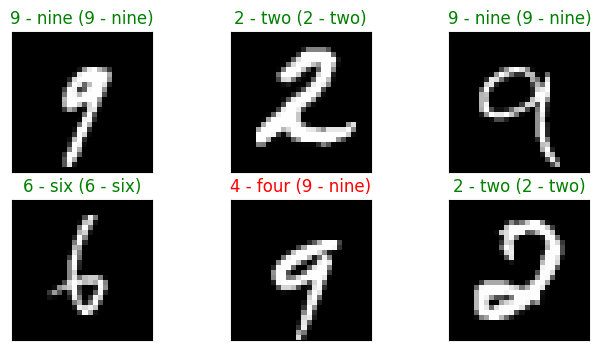

In [73]:
Test_plot(model,test_DL)

In [74]:
# 파라미터 수 구하기
def count_params(model):
    num = sum([p.numel() for p in model.parameters() if p.requires_grad])
    return num

In [75]:
print(count_params(load_model))

79510
